**Problem Statement**

Understanding the problem statement can give an intitutions of what we face ahead of time.
In this problem statement the aim is to build a predictive model t find out the sales of each house so that it would help in price negotiation

In [133]:
#Export important libraries
#Data preprocessing and ploting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Statistics
from scipy.stats import skew, norm
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

#Misc
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,LeaveOneOut,KFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,scale,StandardScaler,RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

#Machine Learning Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge, LassoCV, RidgeCV, ElasticNet, LassoLarsCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor
import lightgbm as lgm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor,XGBRegressor
from mlxtend.regressor import StackingCVRegressor

In [61]:
#Acquire the training and testing data
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

# Data Exploration Part

In [62]:
print("Shaping of training data",train_df.shape)
print("Shaping of testing data",test_df.shape)

Shaping of training data (1460, 81)
Shaping of testing data (1459, 80)


In [63]:
#See top 5 records of training data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [65]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [66]:
test_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [67]:
train_miss=train_df.isnull().sum()
test_miss=test_df.isnull().sum()

In [68]:
train_miss

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

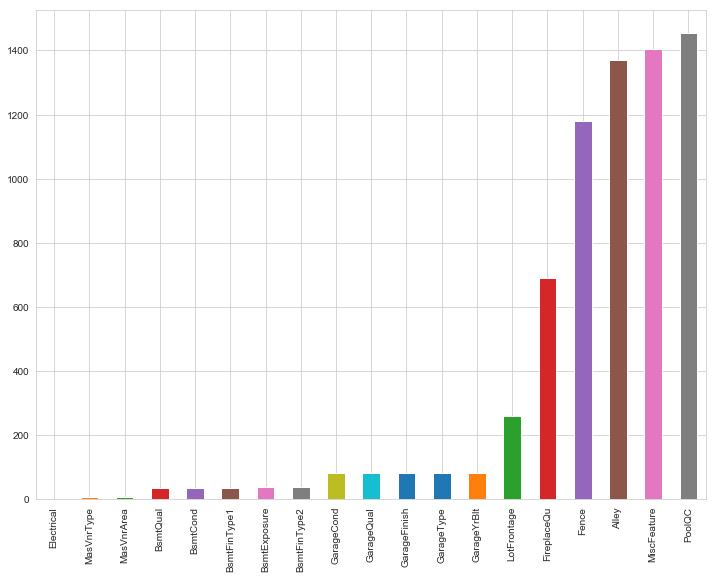

In [69]:
#visualize the missing value in training datasets
plt.subplots(figsize=(12, 9))
sns.set_style("whitegrid")
train_miss=train_miss[train_miss>0]
train_miss.sort_values(inplace=True)
train_miss.plot(kind='bar')

In [70]:
test_miss=test_miss[test_miss>0]
test_miss

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

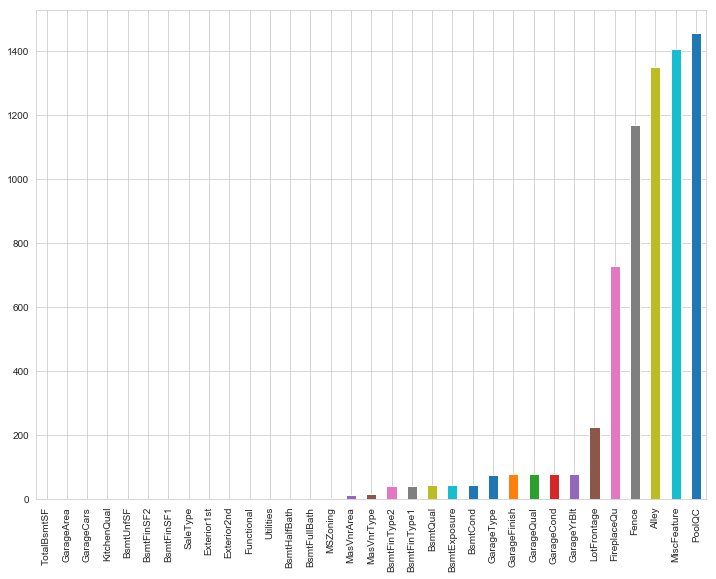

In [71]:
#visualize missing value in test datasets
plt.subplots(figsize=(12, 9))
test_miss=test_miss[test_miss>0]
test_miss.sort_values(inplace=True)
test_miss.plot(kind='bar')

In [72]:
#Description of train datasets
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [73]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [74]:
quantative=[f for f in train_df.columns if train_df.dtypes[f]!=object]
print("total number of quantative varibale is", len(quantative)) 
print(quantative)

total number of quantative varibale is 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [75]:
qualitative=[f for f in train_df.columns if train_df.dtypes[f]==object]
print("total number of qualitative variable is", len(qualitative))
print(qualitative)

total number of qualitative variable is 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [76]:
#Now look at Output variable(SalesPrice)
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

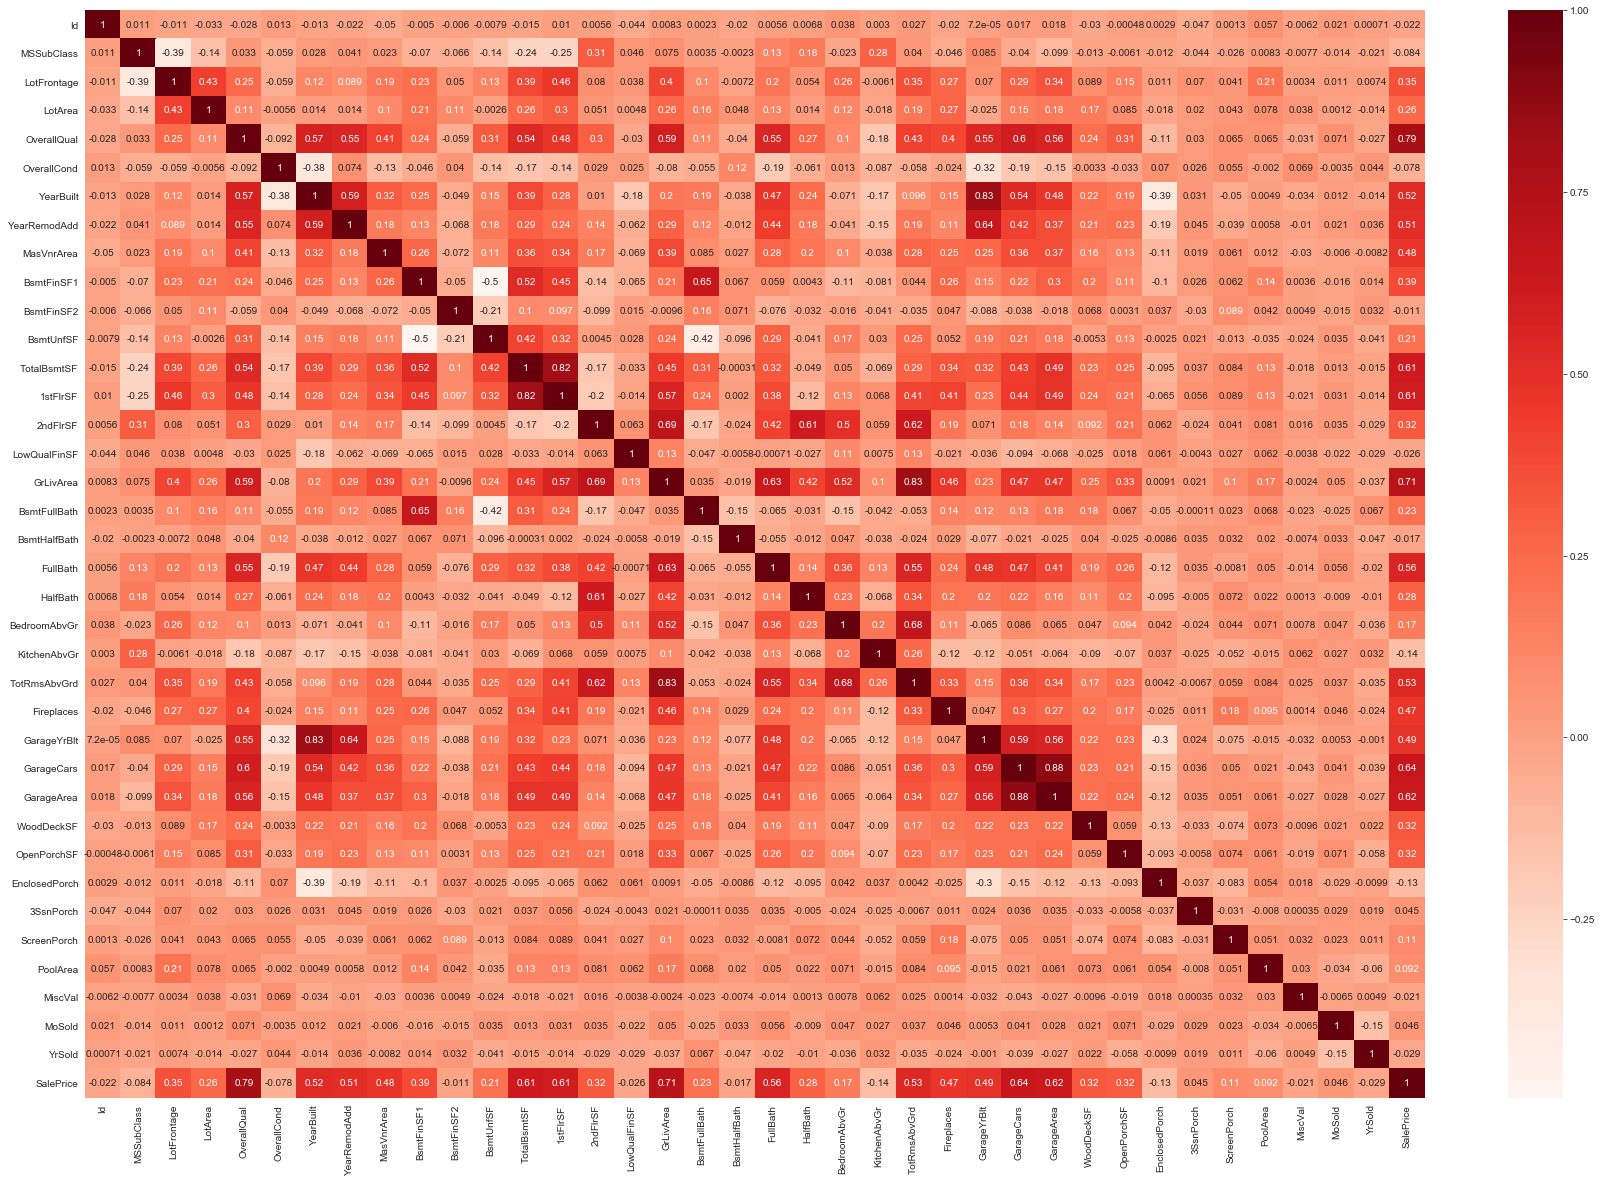

In [77]:
corrmat=train_df.corr()
plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, annot=True,cmap=plt.cm.Reds);

In [79]:
cor_target=abs(corrmat['SalePrice'])
pos_relevant_feature=cor_target[cor_target>0.5]
neg_relevat_feature=cor_target[cor_target<0]
pos_relevant_feature

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [80]:
len(pos_relevant_feature), len(neg_relevat_feature)

(11, 0)

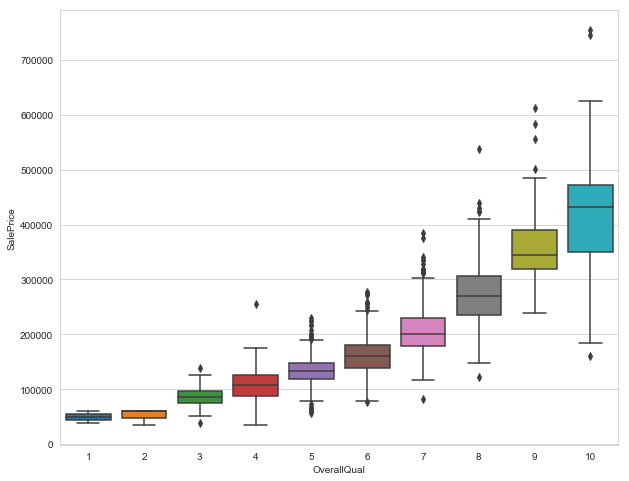

In [81]:
plt.subplots(figsize=(10,8))
sns.boxplot(x=train_df['OverallQual'],y=train_df['SalePrice'])
plt.show()

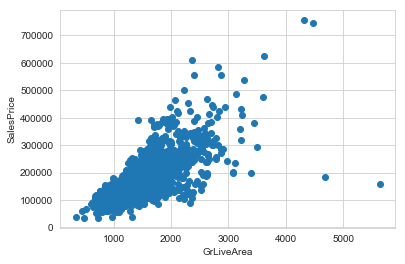

In [82]:
plt.scatter(x=train_df['GrLivArea'],y=train_df['SalePrice'])
plt.xlabel("GrLiveArea")
plt.ylabel("SalesPrice")
plt.show()

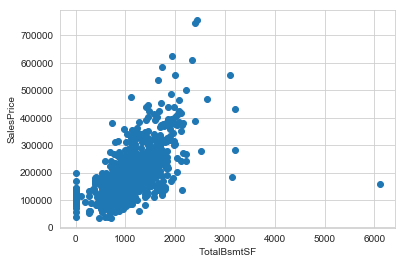

In [83]:
plt.scatter(x=train_df['TotalBsmtSF'],y=train_df['SalePrice'])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalesPrice")
plt.show()

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'SalesPrice distribution')

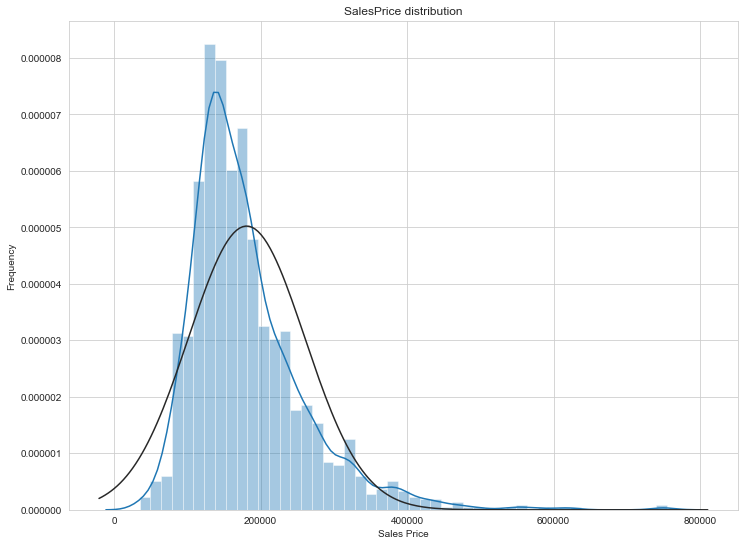

In [84]:
plt.subplots(figsize=(12, 9))
sns.distplot(train_df.SalePrice, fit=norm)
plt.ylabel("Frequency")
plt.xlabel("Sales Price")
plt.title("SalesPrice distribution")

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'SalesPrice distribution after log transform')

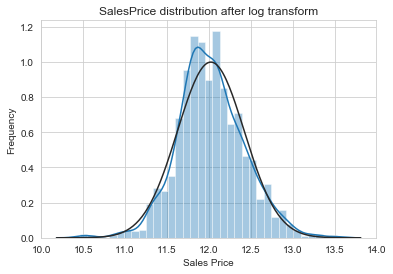

In [85]:
train_df['SalePrice']=np.log1p(train_df['SalePrice'])
sns.distplot(train_df['SalePrice'],fit=norm)
plt.ylabel("Frequency")
plt.xlabel("Sales Price")
plt.title("SalesPrice distribution after log transform")

In [86]:
train=train_df.copy()
test=test_df.copy()

In [87]:
#Remove id from train and test datasets
train_Id=train_df['Id']
test_Id=test_df['Id']
train_df.drop(['Id'],axis=1,inplace=True)
test_df.drop(['Id'],axis=1,inplace=True)
print(train_df.shape)
print(test_df.shape)

(1460, 80)
(1459, 79)


In [88]:
train_df.drop(train_df[(train_df['OverallQual']<5)& (train_df['SalePrice']>200000)].index,inplace=True)
train_df.drop(train_df[(train_df['GrLivArea']>4500)&(train_df['SalePrice']<300000)].index,inplace=True)
train_df.reset_index(drop=True,inplace=True)

In [89]:
train_label=train_df['SalePrice'].reset_index(drop=True)
train_feature=train_df.drop(['SalePrice'], axis=1)
test_feature=test_df

In [90]:
train_feature.shape, train_label.shape,test_feature.shape

((1458, 79), (1458,), (1459, 79))

In [91]:
combined_df=pd.concat([train_feature,test_feature]).reset_index(drop=True)
combined_df.shape

(2917, 79)

In [92]:
test_feature.shape

(1459, 79)

In [93]:
combined_df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40, 150], dtype=int64)

In [94]:
combined_df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [95]:
combined_df['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [96]:
combined_df['Functional'].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev', nan],
      dtype=object)

In [97]:
combined_df['Functional'].describe()

count     2915
unique       7
top        Typ
freq      2715
Name: Functional, dtype: object

In [98]:
combined_df['Electrical'].describe()

count      2916
unique        5
top       SBrkr
freq       2669
Name: Electrical, dtype: object

In [99]:
combined_df['KitchenQual'].describe()

count     2916
unique       4
top         TA
freq      1492
Name: KitchenQual, dtype: object

In [100]:
combined_df['PoolQC'].describe()

count      9
unique     3
top       Ex
freq       4
Name: PoolQC, dtype: object

In [101]:
combined_df['Exterior1st'].describe()

count        2916
unique         15
top       VinylSd
freq         1025
Name: Exterior1st, dtype: object

In [102]:
combined_df['Exterior2nd'].describe()

count        2916
unique         16
top       VinylSd
freq         1014
Name: Exterior2nd, dtype: object

In [103]:
combined_df['SaleType'].describe()

count     2916
unique       9
top         WD
freq      2525
Name: SaleType, dtype: object

In [104]:
combined_df['MSSubClass'] = combined_df['MSSubClass'].apply(str)
combined_df['YrSold'] = combined_df['YrSold'].astype(str)
combined_df['MoSold'] = combined_df['MoSold'].astype(str)
combined_df['Functional'] = combined_df['Functional'].fillna('Typ') 
combined_df['Electrical'] = combined_df['Electrical'].fillna("SBrkr") 
combined_df['KitchenQual'] = combined_df['KitchenQual'].fillna("TA") 
combined_df["PoolQC"] = combined_df["PoolQC"].fillna("None")
combined_df['Exterior1st'] = combined_df['Exterior1st'].fillna(combined_df['Exterior1st'].mode()[0]) 
combined_df['Exterior2nd'] = combined_df['Exterior2nd'].fillna(combined_df['Exterior2nd'].mode()[0])
combined_df['SaleType'] = combined_df['SaleType'].fillna(combined_df['SaleType'].mode()[0])

In [105]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combined_df[col] = combined_df[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    combined_df[col] = combined_df[col].fillna('None')

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combined_df[col] = combined_df[col].fillna('None')

combined_df['MSZoning'] = combined_df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [106]:
# Filling the rest of the categorical features
objects = []
for i in combined_df.columns:
    if combined_df[i].dtype == object:
        objects.append(i)
combined_df.update(combined_df[objects].fillna('None'))

In [107]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in combined_df.columns:
    if combined_df[i].dtype in numeric_dtypes:
        numerics.append(i)
combined_df.update(combined_df[numerics].fillna(0))

In [108]:
combined_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

In [109]:
combined_df.shape

(2917, 79)

In [110]:
#find the skewness of numerical feature    
skewed_feature=combined_df[numerics].apply(lambda x:skew(x)).sort_values(ascending=False)
high_skew=skewed_feature[skewed_feature>0.5]
high_skew.head()

MiscVal         21.939672
PoolArea        17.688664
LotArea         13.109495
LowQualFinSF    12.084539
3SsnPorch       11.372080
dtype: float64

In [111]:
#normalized skewed feature
for i in high_skew.index:
    combined_df[i]=boxcox1p(combined_df[i],boxcox_normmax(combined_df[i]+1))

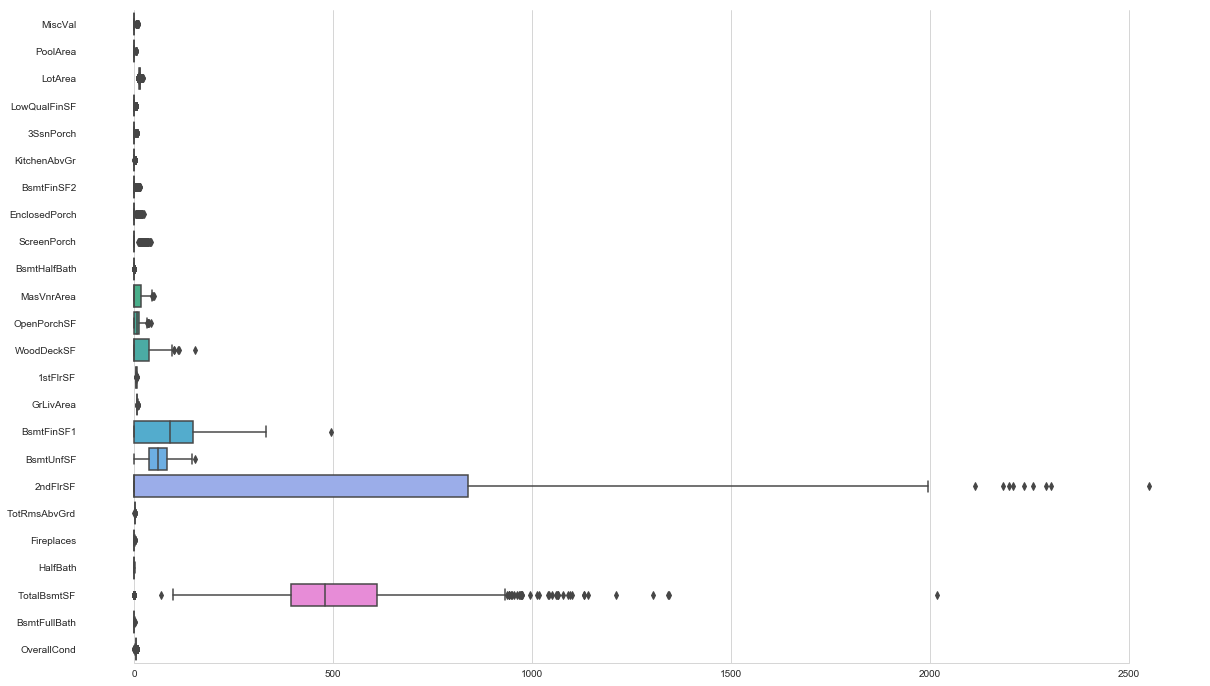

In [112]:
plt.subplots(figsize=(20,12))
sns.boxplot(data=combined_df[high_skew.index] , orient="h")
sns.despine(trim=True,left=True)

In [113]:
combined_df['BsmtFinType1_Unf'] = 1*(combined_df['BsmtFinType1'] == 'Unf')
combined_df['HasWoodDeck'] = (combined_df['WoodDeckSF'] == 0) * 1
combined_df['HasOpenPorch'] = (combined_df['OpenPorchSF'] == 0) * 1
combined_df['HasEnclosedPorch'] = (combined_df['EnclosedPorch'] == 0) * 1
combined_df['Has3SsnPorch'] = (combined_df['3SsnPorch'] == 0) * 1
combined_df['HasScreenPorch'] = (combined_df['ScreenPorch'] == 0) * 1
combined_df['YearsSinceRemodel'] = combined_df['YrSold'].astype(int) - combined_df['YearRemodAdd'].astype(int)
combined_df['Total_Home_Quality'] = combined_df['OverallQual'] + combined_df['OverallCond']
combined_df = combined_df.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
combined_df['TotalSF'] = combined_df['TotalBsmtSF'] + combined_df['1stFlrSF'] + combined_df['2ndFlrSF']
combined_df['YrBltAndRemod'] = combined_df['YearBuilt'] + combined_df['YearRemodAdd']

combined_df['Total_sqr_footage'] = (combined_df['BsmtFinSF1'] + combined_df['BsmtFinSF2'] +
                                 combined_df['1stFlrSF'] + combined_df['2ndFlrSF'])
combined_df['Total_Bathrooms'] = (combined_df['FullBath'] + (0.5 * combined_df['HalfBath']) +
                               combined_df['BsmtFullBath'] + (0.5 * combined_df['BsmtHalfBath']))
combined_df['Total_porch_sf'] = (combined_df['OpenPorchSF'] + combined_df['3SsnPorch'] +
                              combined_df['EnclosedPorch'] + combined_df['ScreenPorch'] +
                              combined_df['WoodDeckSF'])
combined_df['TotalBsmtSF'] = combined_df['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
combined_df['2ndFlrSF'] = combined_df['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
combined_df['GarageArea'] = combined_df['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
combined_df['GarageCars'] = combined_df['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
combined_df['LotFrontage'] = combined_df['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
combined_df['MasVnrArea'] = combined_df['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
combined_df['BsmtFinSF1'] = combined_df['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

combined_df['haspool'] = combined_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
combined_df['has2ndfloor'] = combined_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
combined_df['hasgarage'] = combined_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
combined_df['hasbsmt'] = combined_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
combined_df['hasfireplace'] = combined_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [114]:
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']

combined_df = logs(combined_df, log_features)

In [115]:
combined_df.shape

(2917, 124)

In [116]:
combined_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_log,MiscVal_log,YearRemodAdd_log,TotalSF_log
0,60,RL,65.0,13.833055,None,Reg,Lvl,Inside,Gtl,CollgCr,...,6.308117,0.009950,2.571872,0.009950,0.00995,0.00995,0.00995,0.00995,7.602905,7.282823
1,20,RL,80.0,14.117918,None,Reg,Lvl,FR2,Gtl,Veenker,...,6.133420,4.046453,0.009950,0.009950,0.00995,0.00995,0.00995,0.00995,7.589341,6.398816
2,60,RL,68.0,14.476513,None,IR1,Lvl,Inside,Gtl,CollgCr,...,6.411835,0.009950,2.389779,0.009950,0.00995,0.00995,0.00995,0.00995,7.602406,7.311622
3,70,RL,60.0,14.106197,None,IR1,Lvl,Corner,Gtl,Crawfor,...,6.466160,0.009950,2.300194,2.835018,0.00995,0.00995,0.00995,0.00995,7.586301,7.162684
4,60,RL,84.0,15.022009,None,IR1,Lvl,FR2,Gtl,NoRidge,...,6.729836,3.767129,2.726647,0.009950,0.00995,0.00995,0.00995,0.00995,7.601407,7.509612


In [117]:
final_df = pd.get_dummies(combined_df).reset_index(drop=True)
print('df size:', final_df.shape)
final_df.head()

df size: (2917, 371)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,13.833055,7,3.991517,2003,2003,19.433174,144.117862,0.0,29.991052,...,0,0,0,1,0,0,0,0,1,0
1,80.0,14.117918,6,6.000033,1976,1976,54.598150,181.719186,0.0,44.135410,...,0,0,0,1,0,0,0,0,1,0
2,68.0,14.476513,7,3.991517,2001,2002,17.768840,110.441033,0.0,56.896528,...,0,0,0,1,0,0,0,0,1,0
3,60.0,14.106197,7,3.991517,1915,1970,54.598150,61.795315,0.0,64.808848,...,0,0,0,1,1,0,0,0,0,0
4,84.0,15.022009,8,3.991517,2000,2000,25.404163,136.624601,0.0,61.166371,...,0,0,0,1,0,0,0,0,1,0


In [121]:
#Remove duplicate columns
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [122]:
final_df.shape

(2917, 370)

In [123]:
X = final_df.iloc[:len(train_label), :]
X_test = final_df.iloc[len(train_label):, :]
X.shape, train_label.shape, X_test.shape

((1458, 370), (1458,), (1459, 370))

In [124]:
#Setup Cross validation and finding error metrics

In [125]:
kf=KFold(n_splits=12,random_state=42,shuffle=True)

In [136]:
def rmse(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))
def cv_rmse(model,X=X):
    rmse=np.sqrt(-cross_val_score(model, X, train_label, scoring="neg_mean_squared_error", cv=kf))
    return rmse

In [127]:
#Setting Models

In [131]:
LGBMRegressor()

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [144]:
lgbm=LGBMRegressor(objective='regression',learning_rate=0.01,n_estimators=7500,max_bin=300,bagging_fraction=0.8,bagging_freq=4,random_state=42,
                  num_leaves=20,bagging_seed=10,feature_fraction=0.3,feature_fraction_seed=10)
lgbm.fit(X,train_label)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=10,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.3, feature_fraction_seed=10,
       importance_type='split', learning_rate=0.01, max_bin=300,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=7500, n_jobs=-1, num_leaves=20,
       objective='regression', random_state=42, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [145]:
score=cv_rmse(lgbm)
print(score)

[0.09083014 0.14277915 0.10621627 0.12203063 0.13098888 0.12269466
 0.11022808 0.13624434 0.13676285 0.11006279 0.10477027 0.09426877]


In [138]:
score.mean()

0.12201100415896528

In [140]:
submission=pd.read_csv('submission1.csv')
submission.shape

(1459, 2)

In [142]:
submission.iloc[:,1]=np.floor(np.expm1(lgbm.predict(X_test)))
submission.iloc[:,1]

0       127411.0
1       163069.0
2       183762.0
3       197590.0
4       183365.0
5       172688.0
6       172027.0
7       167343.0
8       172917.0
9       132364.0
10      186526.0
11       93769.0
12       97868.0
13      151589.0
14      140893.0
15      377172.0
16      248537.0
17      294885.0
18      248255.0
19      518006.0
20      325747.0
21      204295.0
22      165096.0
23      168836.0
24      173310.0
25      191976.0
26      342544.0
27      233780.0
28      206853.0
29      202882.0
          ...   
1429     72479.0
1430    126751.0
1431     45490.0
1432    106180.0
1433     55010.0
1434    344025.0
1435    280161.0
1436    209937.0
1437    140187.0
1438    210326.0
1439    163744.0
1440    191711.0
1441    179647.0
1442    322222.0
1443    350991.0
1444    104743.0
1445    214644.0
1446    111468.0
1447    137319.0
1448    141480.0
1449     82968.0
1450     80565.0
1451    155500.0
1452     84627.0
1453     75497.0
1454     82112.0
1455     82126.0
1456    155108

In [143]:
submission.to_csv('submission_lgbm.csv',index=False)

In [146]:
xgboost=XGBRegressor(learning_rate=0.01,n_estimators=6000,max_depth=5,min_child_weight=0,gamma=0.6,subsample=0.7,colsample_bytree=0.7,objective='reg:linear',nthread=-1,scale_pos_weight=1,seed=27,reg_alpha=0.0006,random_state=42)
xgboost.fit(X,train_label)

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:16:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.6,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=0, missing=None, n_estimators=6000,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=42,
       reg_alpha=0.0006, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=None, subsample=0.7, verbosity=1)

In [147]:
score=cv_rmse(xgboost)
print(score.mean())

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:17:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:18:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:18:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:19:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:19:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:20:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:21:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:21:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:22:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:22:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:23:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:23:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.135606723139407


In [149]:
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))
rdg=ridge.fit(X,train_label)

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [150]:
score_r=cv_rmse(ridge)
print(score_r.mean())

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\User

0.11002734189434489


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [151]:
submission=pd.read_csv('submission1.csv')
submission.iloc[:,1]=np.floor(np.expm1(ridge.predict(X_test)))
submission.iloc[:,1]

0       117516.0
1       155805.0
2       184567.0
3       199745.0
4       192137.0
5       170761.0
6       178271.0
7       161953.0
8       196509.0
9       117880.0
10      187158.0
11       95526.0
12       93036.0
13      143814.0
14      110196.0
15      359561.0
16      246284.0
17      293747.0
18      283223.0
19      493975.0
20      322151.0
21      211793.0
22      179472.0
23      161231.0
24      189785.0
25      193783.0
26      329826.0
27      238611.0
28      193444.0
29      251128.0
          ...   
1429     79196.0
1430    136237.0
1431     49097.0
1432     78886.0
1433     60205.0
1434    339376.0
1435    285240.0
1436    211683.0
1437    146179.0
1438    209375.0
1439    164795.0
1440    204272.0
1441    181369.0
1442    317506.0
1443    350760.0
1444     84049.0
1445    195637.0
1446    110948.0
1447    128808.0
1448    149551.0
1449     78461.0
1450     80345.0
1451    144838.0
1452     77993.0
1453     76651.0
1454     86642.0
1455     78536.0
1456    175495

In [153]:
submission.to_csv('submission_ridge.csv',index=False)

In [154]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
svr.fit(X,train_label)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('svr', SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.008, gamma=0.0003,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [155]:
score_svr=cv_rmse(svr)
score_svr.mean()

0.10937421039979106

In [157]:
submission=pd.read_csv('submission1.csv')
submission.iloc[:,1]=np.floor(np.expm1(svr.predict(X_test)))
submission.iloc[:,1]

0       118484.0
1       166817.0
2       194616.0
3       204104.0
4       187564.0
5       172601.0
6       178795.0
7       165242.0
8       195678.0
9       125419.0
10      180597.0
11       97892.0
12       97545.0
13      144325.0
14      110157.0
15      362489.0
16      248609.0
17      291493.0
18      289856.0
19      514458.0
20      320990.0
21      210043.0
22      180741.0
23      162771.0
24      186857.0
25      193202.0
26      333342.0
27      246148.0
28      198014.0
29      241491.0
          ...   
1429     81089.0
1430    142094.0
1431     59350.0
1432    100562.0
1433     66959.0
1434    321010.0
1435    277848.0
1436    212243.0
1437    133731.0
1438    204118.0
1439    160508.0
1440    200990.0
1441    185028.0
1442    308155.0
1443    349220.0
1444     97097.0
1445    198093.0
1446    107542.0
1447    127131.0
1448    138574.0
1449     76455.0
1450     80465.0
1451    152236.0
1452     79320.0
1453     72117.0
1454     89396.0
1455     79617.0
1456    169902

In [158]:
submission.to_csv('submission_svr1.csv',index=False)

In [159]:
gbr = GradientBoostingRegressor(n_estimators=6000,learning_rate=0.01,max_depth=4,max_features='sqrt',min_samples_leaf=15,min_samples_split=10,loss='huber',random_state=42)
gbr.fit(X,train_label)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=6000,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [160]:
score_gbr=cv_rmse(gbr)
score_gbr.mean()

0.11226131993356092

In [161]:
submission=pd.read_csv('submission1.csv')
submission.iloc[:,1]=np.floor(np.expm1(gbr.predict(X_test)))
submission.iloc[:,1]

0       124853.0
1       156552.0
2       185725.0
3       196006.0
4       186053.0
5       175681.0
6       173655.0
7       165894.0
8       181480.0
9       127484.0
10      194007.0
11       95126.0
12       94421.0
13      147290.0
14      116368.0
15      370455.0
16      250936.0
17      287849.0
18      280705.0
19      538443.0
20      330893.0
21      200189.0
22      178200.0
23      165706.0
24      181494.0
25      196742.0
26      351256.0
27      231688.0
28      207076.0
29      219631.0
          ...   
1429     80667.0
1430    132922.0
1431     54475.0
1432     96345.0
1433     63032.0
1434    336771.0
1435    283365.0
1436    204918.0
1437    144840.0
1438    208108.0
1439    159412.0
1440    211254.0
1441    188901.0
1442    339018.0
1443    355920.0
1444     97079.0
1445    206471.0
1446    110315.0
1447    132192.0
1448    138464.0
1449     80708.0
1450     76284.0
1451    146778.0
1452     81715.0
1453     72809.0
1454     79124.0
1455     81427.0
1456    162802

In [162]:
submission.to_csv('submission_gbr.csv',index=False)

In [163]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [170]:
rf=rf.fit(X,train_label)

In [164]:
score_rf=cv_rmse(rf)
score_rf.mean()

0.13671563974895926

In [173]:
stack=stack_gen.fit(np.array(X), np.array(train_label))


[17:19:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\User

[17:25:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [174]:
def blended_predictions(X):
    return ((0.1 * ridge.predict(X)) + \
            (0.2 * svr.predict(X)) + \
            (0.1 * gbr.predict(X)) + \
            (0.1 * xgboost.predict(X)) + \
            (0.1 * lgbm.predict(X)) + \
            (0.05 * rf.predict(X)) + \
            (0.35 * stack_gen.predict(np.array(X))))

In [185]:
blended_score = rmse(train_label, blended_predictions(X))
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.07181459558263925


In [186]:
submit=pd.read_csv('submission1.csv')
submit.iloc[:,1]=np.floor(np.expm1(blended_predictions(X_test)))
submit.iloc[:,1]

0       121801.0
1       160573.0
2       184420.0
3       195128.0
4       187825.0
5       172967.0
6       173958.0
7       166067.0
8       187879.0
9       124845.0
10      188044.0
11       96943.0
12       96090.0
13      147159.0
14      120461.0
15      358962.0
16      249412.0
17      290714.0
18      282381.0
19      487290.0
20      318423.0
21      205331.0
22      175256.0
23      166191.0
24      183778.0
25      194382.0
26      329563.0
27      240232.0
28      198074.0
29      223296.0
          ...   
1429     83898.0
1430    137017.0
1431     53927.0
1432     90079.0
1433     57675.0
1434    317086.0
1435    276012.0
1436    206802.0
1437    142425.0
1438    210593.0
1439    161188.0
1440    201192.0
1441    182319.0
1442    316869.0
1443    343575.0
1444     97467.0
1445    200052.0
1446    111609.0
1447    131419.0
1448    142940.0
1449     82174.0
1450     81499.0
1451    147169.0
1452     85065.0
1453     77737.0
1454     87750.0
1455     85028.0
1456    164654

In [191]:
# Fix outleir predictions
q1 = submit['SalePrice'].quantile(0.0045)
q2 = submit['SalePrice'].quantile(0.99)
submit['SalePrice'] = submit['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submit['SalePrice'] = submit['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submit.to_csv("submission_regression1.csv", index=False)

In [189]:
d=pd.read_csv("submit_final.csv")
d.head()

,Id,SalePrice
0,1461,121801.0
1,1462,160573.0
2,1463,184420.0
3,1464,195128.0
4,1465,187825.0
